This project analyzes a 2019 Netflix dataset from Flixable, to analyze trends in movies and TV shows. A 2018 report noted a tripling of TV shows and a decrease in movies since 2010. The dataset includes details like cast, directors, ratings, and release year. Initial analysis focused on data types, missing values, and basic statistics. Exploratory Data Analysis (EDA) was used to find key insights for Netflix's business growth. The goal is to understand content availability by country and Netflix's focus on TV shows v/s movies to inform future content decisions.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [11]:
# basic summary of dataset
df.shape

(7787, 12)

In [12]:
# countng occurences of duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# checking for missing or null values
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [17]:
# Calculating and displaying the percentage of missing values for each column

print('\n Percentage of null values per column : ')
print('\n')
for col in df.columns:

  null_percent = df[col].isna().sum() / len(df) * 100
  if null_percent > 0:
    print(f"{col}'s null percentage -- {round(null_percent, 2)}%")


 Percentage of null values per column : 


director's null percentage -- 30.68%
cast's null percentage -- 9.22%
country's null percentage -- 6.51%
date_added's null percentage -- 0.13%
rating's null percentage -- 0.09%


**Observations** --

1. The dataset comprises 7787 rows and 12-columns.
2. Columns such as 'director', 'cast', and 'country' have a significant number of missing entries.
3. 'date_added' and 'rating' have a small fraction of missing values.
4. No duplicate entries were found in the dataset.
5. The majority of the columns contain categorical information.

In [21]:
# descriptive statistics

print('Statistical Overview -- ')
print(df.describe(include='all'))

Statistical Overview -- 
       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049              

In [22]:
# counting the number of unique values in each column or feature

print('Number of unique values per column -- ')
print (df.nunique())

Number of unique values per column -- 
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


'show_id' and 'title' are the only columns with entirely unique values,
indicating
no duplication across the remaining features.

In [33]:
# creating new df for data manipulations
df1 = df.copy()

In [34]:
df1.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [32]:
df1.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
# Removing 'director' and 'cast' columns

df1.drop(['director', 'cast'], axis = 1, inplace = True)
print ("\n Columns after dropping 'director' and 'cast' : ", df1.columns.tolist())
print ('These columns are deemed less relevant for the subsequent business oriented analysis')


 Columns after dropping 'director' and 'cast' :  ['show_id', 'type', 'title', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
These columns are deemed less relevant for the subsequent business oriented analysis


In [36]:
# Handling missing values in 'date_added' by dropping rows with NaNs

df1.dropna(subset=['date_added'], inplace = True)

In [37]:
# Handling missing values in 'rating' by dropping rows with NaNs

df1.dropna(subset=['rating'], inplace = True)

In [39]:
# Creating 'added year' and 'added month' columns from 'date added'

# 'date_added' is converted into datetime objects, If gets any values it cannot convert into a valid date it will replace those with NaT (Not a Time) instead of raising an error
df1['date_added']  = pd. to_datetime(df1[ 'date_added'], errors = 'coerce')


# creates a new column in df1, strftime('%Y') formats datetime into strings, '%Y' format code specifically extracts the year as a number, eg - "2023-10-26", 'added_year' would be "2023".
df1['added_year']  = df1['date_added'].dt.strftime ('%Y')


# creates a new column in df1, strftime('%B') formats datetime into strings, '%B' format code specifically extracts name of the month, eg - "2023-10-26", 'added month' would be "October".
df1['added month'] = df1['date_added'].dt.strftime ('%B')

In [43]:
print("First 5 rows after adding 'added year' and 'added _month' -- ")
df1.head(5)

First 5 rows after adding 'added year' and 'added _month' -- 


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,added_year,added month
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [44]:
# checkinh for null or missing values after initial cleaning

df1.isna().sum()

,0
show_id,0
type,0
title,0
country,505
date_added,88
release_year,0
rating,0
duration,0
listed_in,0
description,0


In [46]:
# Imputing missing values in 'country' column with the mode

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder


# encoding 'country' column to numeric labels
le = LabelEncoder()
df1['country_encoded'] = le.fit_transform(df1['country'].astype(str))

# replacing NaNs with np.nan after label encoding
df1.loc[df1['country'].isnull(), 'country_encoded'] = np.nan

# apply IterativeImputer
imputer = IterativeImputer(max_iter = 20, random_state = 42)
df1[['country_encoded']] = imputer.fit_transform(df1[['country_encoded']])

# converting encoded column back to original labels
df1['country'] = le.inverse_transform(df1['country_encoded'].round().astype(int))

# Drop the helper encoded column
df1.drop(columns='country_encoded', inplace=True)

print(" Number of unique countries after imputation - ", df1['country'].nunique())

 Number of unique countries after imputation -  681


In [51]:
# country column has multiple values for same rows, so we are creating new column to capture primary country


df1['primary country'] = df1['country'].apply(lambda x: x.split(",")[0].strip())
print(" First few entries of 'primary country -- ")
print(df1['primary country'].head())
print(" Number of unique primary countries:", df1['primary country'].nunique())


 First few entries of 'primary country -- 
0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: primary country, dtype: object
 Number of unique primary countries: 81


The number of unique
countries has been reduced, representing the primary production location.

In [56]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [65]:
# Creating 'age_group' based on 'rating'

rating_map = {
    'TV PG': 'Older Kids' ,
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R' : 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
    }

df1['age_group'] = df1['rating'].replace(rating_map)
print("Unique values in age group -- ", df1['age_group'].unique())

Unique values in age group --  ['Adults' 'Teens' 'TV-PG' 'Kids' 'Older Kids']


In [66]:
df1.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,added_year,added month,primary country,age_group
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Brazil,Adults
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Mexico,Adults
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Singapore,Adults
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,United States,Teens
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States,Teens


Summary of Data Manipulations and Insights --

1. 'director' and 'cast' columns were removed due to their irrelevance for the subsequent analysis.
2. Missing values in the 'country' column were filled using iterative imputer, and a 'primary_country' column was created to represent the first listed country.
3. Rows with missing values in 'rating' and 'date added' were removed.
4. 'added year' and 'added month' were derived from the 'date added' column to facilitate temporal analysis.
5. A new 'age_group' column was created based on the 'rating' system to categorize content by target audience.



---



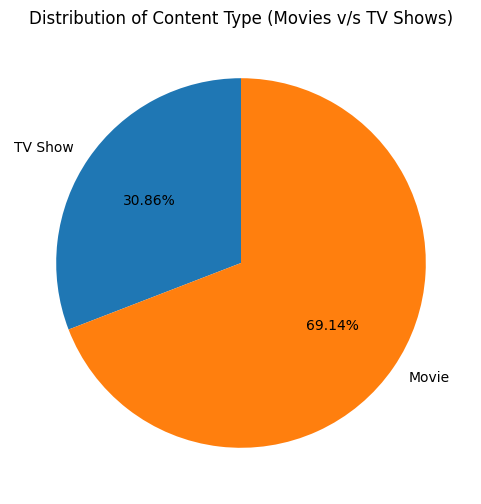

In [71]:
# Analyzing the distribution of content type

content_type_counts = df1['type'].value_counts().sort_values()

plt.figure(figsize=(6, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.2f%%', startangle = 90)
plt.title('Distribution of Content Type (Movies v/s TV Shows)')
plt.show()

Approximately 70% of the content consists of movies, while around 30% are TV shows, indicating a larger category of movies.



---



In [75]:
# Identifying the top countries by content volume

top_countries = df1.groupby('type')['primary country'].value_counts().groupby(level=0).nlargest(10)
print('Top 10 countries by the number of movies and TV shows -- ')
print('\n')
print(top_countries)

Top 10 countries by the number of movies and TV shows -- 


type     type     primary country
Movie    Movie    United States      2097
                  India               883
                  United Kingdom      341
                  South Africa        259
                  Canada              175
                  France              137
                  Spain               119
                  Egypt                93
                  Mexico               79
                  Turkey               78
TV Show  TV Show  United States       777
                  South Africa        281
                  United Kingdom      235
                  Japan               160
                  South Korea         152
                  Canada               84
                  India                73
                  Taiwan               70
                  France               59
                  Australia            50
Name: count, dtype: int64


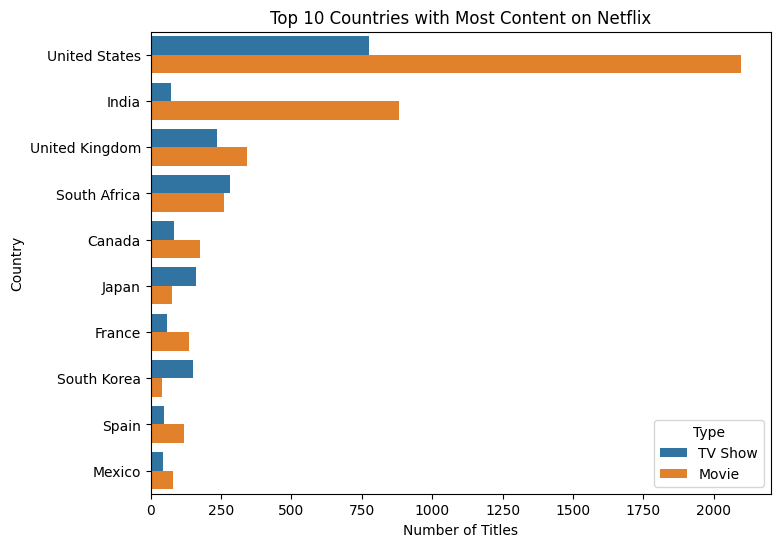

In [77]:

plt.figure(figsize=(8, 6))
sns.countplot(y = 'primary country', hue='type', data= df1, order= df1['primary country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.ylabel( 'Country')
plt.xlabel('Number of Titles')
plt.legend(title='Type')
plt.show()

1. For almost all listed countries, the number of movies significantly outweighs the number of TV shows this suggests that Netflix's content library, at least in these top 10 countries, is heavily skewed towards movies.

2. United States has by far the most content on Netflix, both in terms of TV shows and movies compared to all other countries.

3. A steep drop in content volume after the top few countries. The content available in countries like Spain and Mexico is considerably less than in the US, India, or the UK.



---



<ipython-input-85-67ae262a5ff2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y ='release_year', data = movie_releases, order = movie_releases['release_year'].value_counts().index[:15], palette='bright')


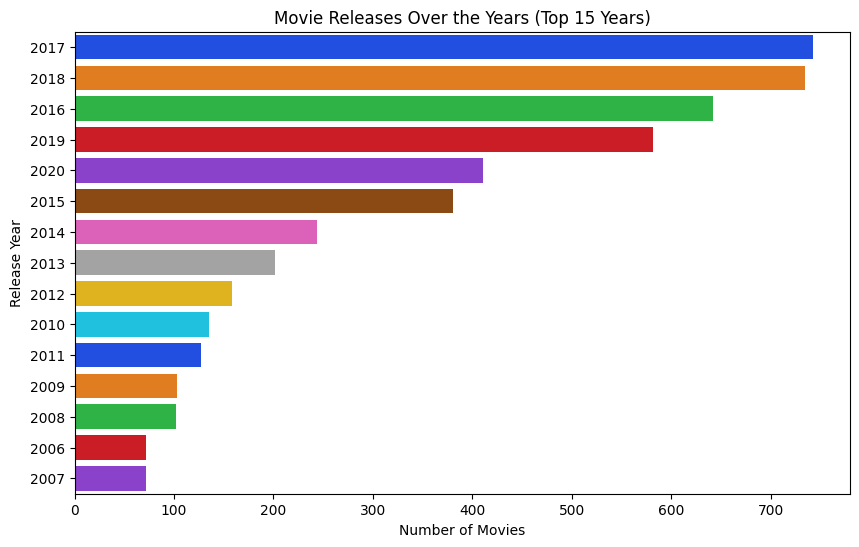

In [85]:
# Analyzing movie releases by year

movie_releases = df1[df1['type'] == 'Movie']
plt.figure(figsize=(10, 6))
sns.countplot(y ='release_year', data = movie_releases, order = movie_releases['release_year'].value_counts().index[:15], palette='bright')
plt.title('Movie Releases Over the Years (Top 15 Years)')
plt.ylabel('Release Year')
plt.xlabel('Number of Movies')
plt.show()

1. chart shows a trend of increasing movie releases in recent years, particularly in the mid to late 2010s with the highest number of movie releases indicating a rise in film production.

2. 2017 stands out as having the highest number of movie releases, exceeding 700 titles.

3. 2018 follows closely behind 2017, also with over 700 releases, almost matching the peak year.

4. 2016 with a significant number of releases, around 650 and 2019 hows a slightly lower but still high number of releases, approximately 570-580.

5. 2020 despite the global pandemic, still managed a substantial number of releases, around 400.




---



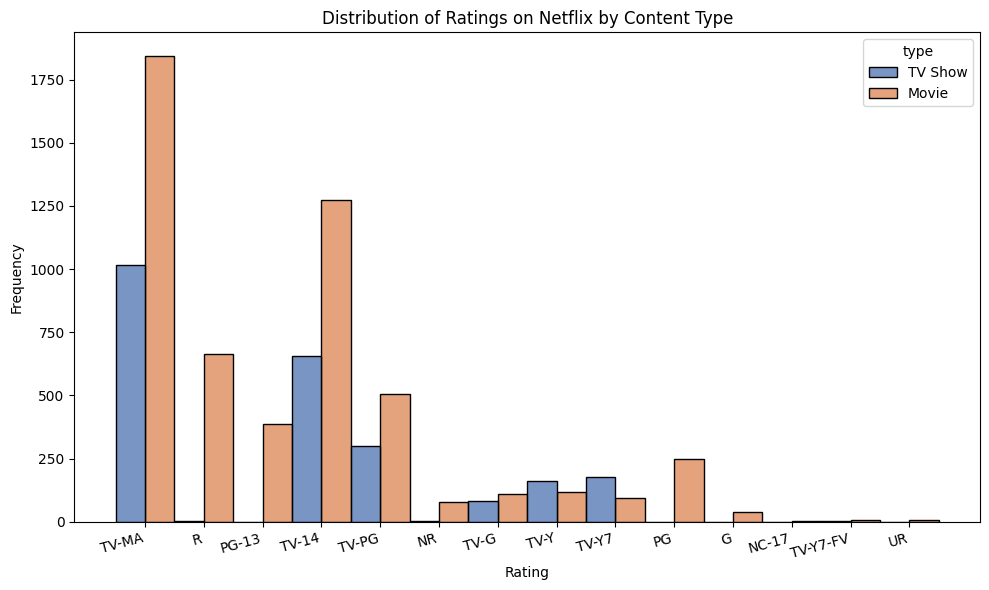

In [93]:
# Examining the distribution of ratings

plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='rating', discrete=True, hue='type', palette='deep', multiple='dodge')
plt.title('Distribution of Ratings on Netflix by Content Type')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

1. Netflix appears to have a strong emphasis on mature and teen-oriented content, particularly movies, given the high frequencies of TV-MA, R, PG-13, and TV-14 ratings.

2. While movies generally have higher counts for mature ratings, TV shows hold their own, especially for the TV-MA and TV-14 categories, and dominate in children's specific ratings (TV-Y, TV-Y7).

3. despite the dominance of certain rating categories, Netflix offers content across a wide spectrum of ratings, from very young children (TV-Y) to adults only (NC-17).

4. presence of various TV and Movie specific rating systems (TV-MA vs R, TV-Y vs G) indicates Netflix's adherence to different content classification standards.



---



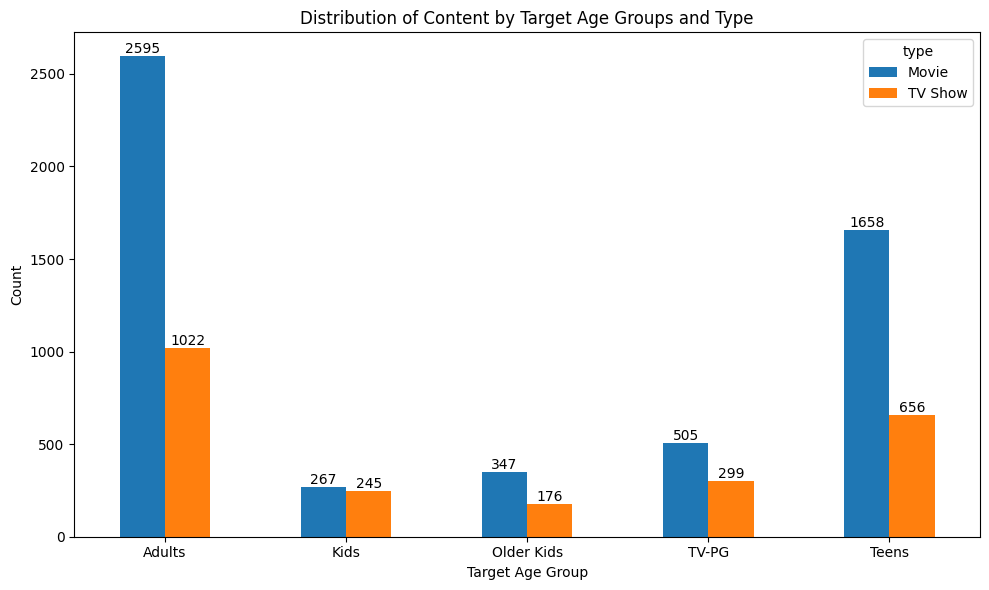

In [95]:
# Analyzing content distribution by target age groups

age_group_counts = df1.groupby(['age_group', 'type']).size().unstack()
ax = age_group_counts.plot(kind = 'bar', figsize=(10, 6))
for container in ax.containers:
  ax.bar_label(container)
plt.title('Distribution of Content by Target Age Groups and Type')
plt.xlabel( 'Target Age Group' )
plt.ylabel ('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. Adults age group has by far the most content, with 2595 Movies and 1022 TV Shows, totaling over 3600 titles indicates Netflix's primary focus on adult viewership.

2. Kids category has very low content 267 Movies and 245 TV Shows.
Older Kids has even less 347 Movies and only 176 TV Shows suggests a less library for these specific age groups compared to adult or teen content.

3. after Adults, Teens category has the second highest amount of content, indicating Netflix's strong appeal to this demographic.

4.  "TV-PG" as a target age group suggests that the data might be derived from content ratings themselves, rather than purely demographic targeting. TV-PG content is generally suitable for most audiences with parental guidance, bridging the gap between kids content and more mature themes.



---



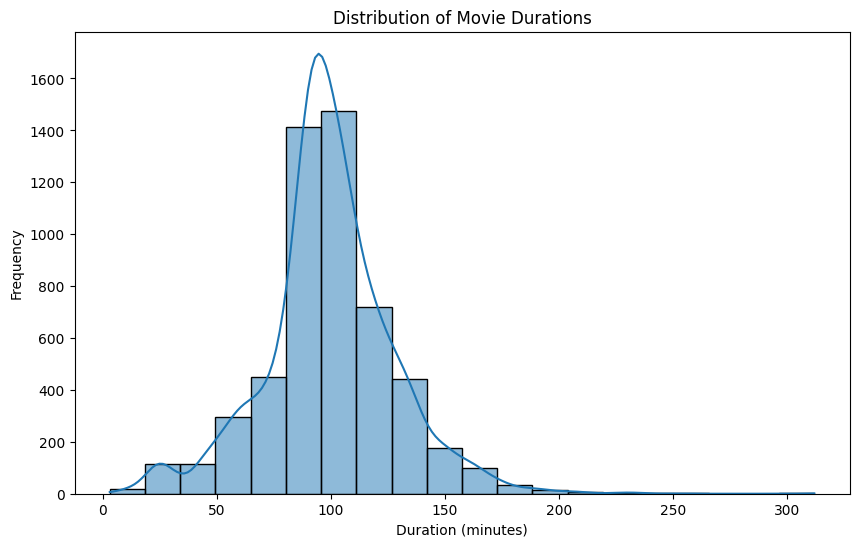

In [98]:
# Analyzing the duration of movies
movie_durations = df1[df1['type'] == 'Movie']['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(movie_durations, bins = 20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel( 'Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

The majority of movies on Netflix seem to have a duration between approximately 90 and 120 minutes, as indicated by the peak of the distribution.



---



<ipython-input-104-a4cc39353bf1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette= 'muted')


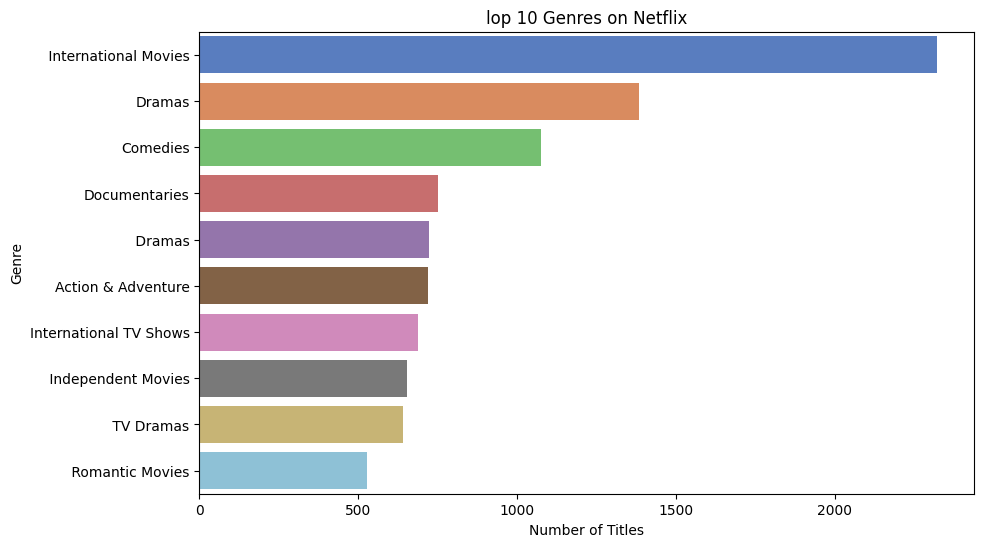

In [104]:
# Identifying the top genres
genre_counts = df1['listed_in'].str.split(',', expand=True).stack().value_counts().nlargest(10)
plt.figure(figsize =(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette= 'muted')
plt.title('lop 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel ('Genre')
plt.show()


1. International Movies leads Significantly with over 2000 titles, suggests a strong focus on acquiring or producing non-Hollywood films.

2. "Dramas" comes in second with around 1400 titles, indicating its evergreen popularity "Comedies" follows closely with over 1000 titles, showing these two broad categories are foundational to Netflix's library.

3. Both "Documentaries" and "Action & Adventure" genres have a substantial presence, each with over 600 titles, suggesting a demand for informative and thrilling content.

4. "International TV Shows" with over 600 titles indicates that Netflix also invests in TV series from various countries, mirroring the strength of "International Movies."

5. chart includes both broad categories (like "Dramas" and "Comedies") and more specific ones (like "International Movies" and "Independent Movies"). The fact that "Dramas" appears twice (once as "Dramas" and once lower down also as "Dramas" with a similar count, which might be a labeling error or a distinction in sub-genres not immediately clear from the chart) and "Movies" are broken down by origin ("International," "Independent")

6. "Independent Movies" and "TV Dramas"  have similar counts, around 600 titles, further diversifying the content.

7. "Romantic Movies" has the fewest titles among them, with around 500.



---



# **HYPOTHESIS TESTING**


In [110]:
import numpy as np
from statsmodels.stats.weightstats import ztest

print ("\n--- Hypothesis Testing ---")
print('\n')
print("Hypothesis -- The count of movies on Netflix exceeds the count of TV shows.")
print("Null Hypothesis (HO) -- The mean count of movies is equal to the mean count of TV shows.")
print("Alternative Hypothesis (H1) -- The mean count of movies is not equal to the mean count of TV shows.")
print ("Performing a two-sample z-test to evaluate the hypothesis.")

# Counting movies and TV shows
movie_count = df1[df1['type'] == 'Movie']['type'].size
tv_show_count = df1[df1['type'] == 'TV Show']['type'].size
sample_counts = np.array([movie_count, tv_show_count ])
n_observations = np.array([len(df1), len(df1) ])


print('\n')
# Performing the two-sample z-test
z_statistic, P_value = ztest(sample_counts, n_observations, value = 0, alternative = 'two-sided')
print ("z-statistic  =  ", z_statistic)
print ("P-value      =  ", P_value)

print('\n')
# Setting the significance level
alpha_value = 0.05

print (" Significance Level (alpha) --  ", alpha_value)


# Interpreting the results
if P_value < alpha_value:
  print("\n Result  -- Reject the null hypothesis, hence Alternate hypothesis is accepted.")
  print("Conclusion -- There is a statistically significant difference in the number of movies and TV shows available on Netflix.")
else:
  print("\n Result -- Fail to reject the null hypothesis, accept the null hypothesis.")
  print("Conclusion -- There is no statistically significant difference in the number of movies and TV shows available on Netflix based on this test.")


--- Hypothesis Testing ---


Hypothesis -- The count of movies on Netflix exceeds the count of TV shows.
Null Hypothesis (HO) -- The mean count of movies is equal to the mean count of TV shows.
Alternative Hypothesis (H1) -- The mean count of movies is not equal to the mean count of TV shows.
Performing a two-sample z-test to evaluate the hypothesis.


z-statistic  =   -2.612642905178211
P-value      =   0.008984512214737946


 Significance Level (alpha) --   0.05

 Result  -- Reject the null hypothesis, hence Alternate hypothesis is accepted.
Conclusion -- There is a statistically significant difference in the number of movies and TV shows available on Netflix.


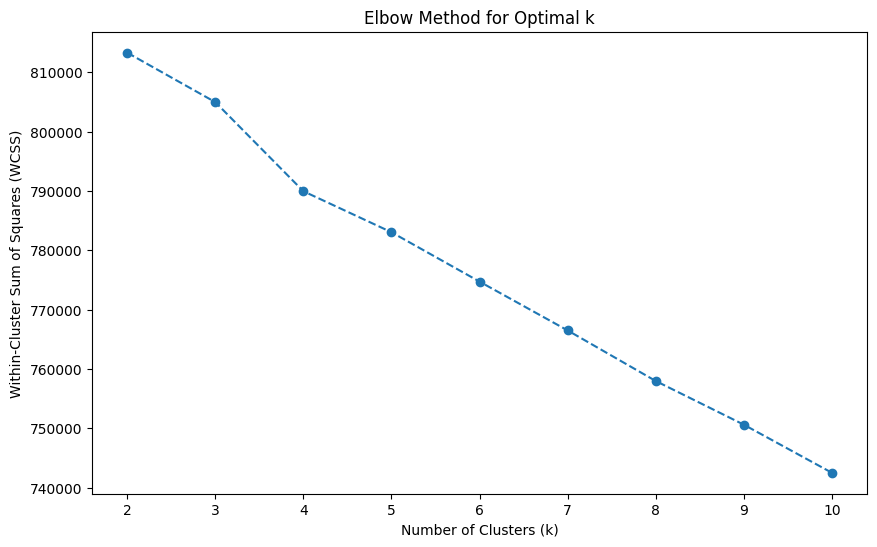

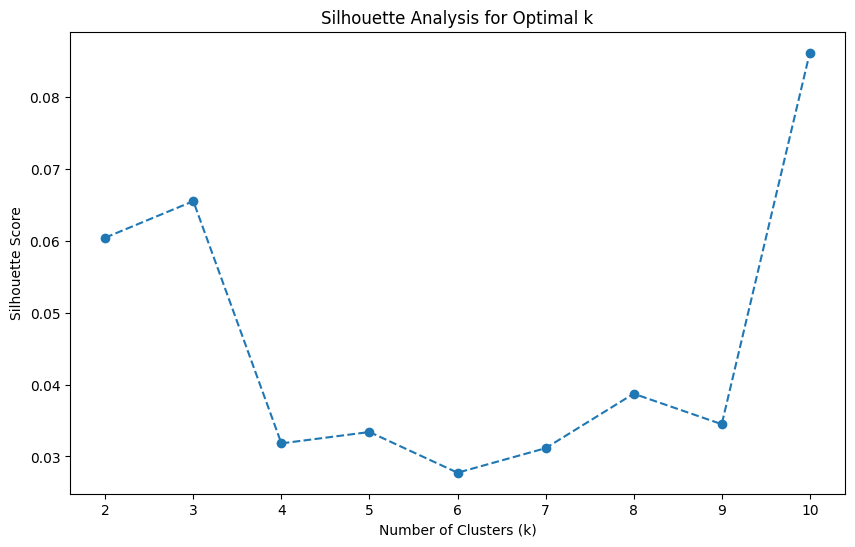

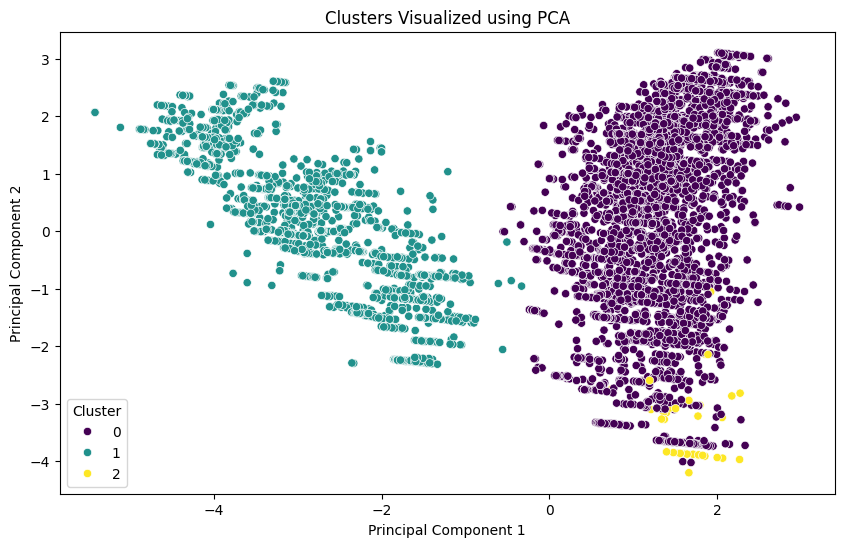


Cluster Interpretation (Basic) -- 
            type primary country  release_year rating
cluster                                              
0          Movie   United States          2017  TV-MA
1        TV Show   United States          2020  TV-MA
2          Movie   United States          2004      G


In [115]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Select relevant features
features = ['type', 'primary country', 'release_year', 'rating', 'listed_in']
data = df1[features].copy()  # Create a copy to avoid modifying the original DataFrame

# Step 2: One-hot encode categorical features
data = pd.get_dummies(data, columns=['type', 'primary country', 'rating'])

# Step 3: One-hot encode top genres from 'listed_in'
def encode_top_genres(df, top_n=10):
    genres = df['listed_in'].str.split(', ', expand=True).stack()
    top_genres = genres.value_counts().head(top_n).index.tolist()
    for genre in top_genres:
        df[f'genre_{genre}'] = df['listed_in'].str.contains(genre, na=False).astype(int)
    return df

data = encode_top_genres(data)
data.drop('listed_in', axis=1, inplace=True)

# Step 4: Feature matrix
X = data.copy()

# Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ✅ Fix: corrected typo from 'transtorm' to 'transform'

# Step 6: Elbow Method to determine optimal k
wcss = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Step 7: Silhouette Scores for k selection
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 8: Choose optimal k (you can update k based on plots)
k = 3

# Step 9: Final K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Step 10: Add cluster labels to the original df
df1['cluster'] = cluster_labels

# Step 11: PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['principal_component_1', 'principal_component_2'])
pca_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 12: Cluster interpretation
print("\nCluster Interpretation (Basic) -- ")
print(df1.groupby('cluster')[['type', 'primary country', 'release_year', 'rating']].agg(lambda x: x.value_counts().index[0]))
